In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

Q1: Write a Python program to determine if a given Joint PMF corresponds to independent random variables (X,Y) or not. Take the range of values of random variables X and Y as the input and then take the Joint PMF as the input. Assume X and Y take finite number of values.

In [ ]:
def joint_pmf(rows,columns):
  random_mat=np.random.rand(rows,columns)
  joint=random_mat/random_mat.sum()
  return joint

def joint_pmf_table(joint,x_val,y_val):
  print("    ",end="")
  for y in y_val:
    print(f"{y:>10}",end="")
  print()
  for i, row in enumerate(joint):
    print(f"{x_val[i]:<4}", end="")
    for x in row:
      print(f"{x:>10.4f}", end="")
    print()

x_val=np.arange(1,7)
y_val=np.arange(6,13)

joint=joint_pmf(len(x_val),len(y_val))
joint_pmf_table(joint,x_val,y_val)


             6         7         8         9        10        11        12
1       0.0367    0.0208    0.0270    0.0110    0.0315    0.0076    0.0066
2       0.0428    0.0309    0.0273    0.0333    0.0233    0.0365    0.0011
3       0.0346    0.0363    0.0082    0.0291    0.0117    0.0385    0.0268
4       0.0415    0.0300    0.0167    0.0188    0.0119    0.0115    0.0383
5       0.0171    0.0307    0.0322    0.0337    0.0360    0.0324    0.0307
6       0.0007    0.0116    0.0210    0.0030    0.0403    0.0081    0.0123


In [ ]:
def match(joint):
  m,n=joint.shape

  marginal_x=np.sum(joint,axis=1)
  marginal_y=np.sum(joint,axis=0)
  marginal_mat=np.zeros([len(x_val),len(y_val)])

  for i in range(len(marginal_mat)):
    for j in range(len(marginal_mat[i])):
      marginal_mat[i][j]=marginal_x[i]*marginal_y[j]
  return marginal_mat

marginal_mat=match(joint)
joint_pmf_table(marginal_mat,x_val,y_val)

             6         7         8         9        10        11        12
1       0.0245    0.0226    0.0187    0.0182    0.0218    0.0190    0.0163
2       0.0338    0.0312    0.0258    0.0251    0.0302    0.0263    0.0226
3       0.0321    0.0297    0.0245    0.0239    0.0287    0.0250    0.0214
4       0.0293    0.0270    0.0223    0.0217    0.0261    0.0227    0.0195
5       0.0369    0.0341    0.0282    0.0274    0.0329    0.0287    0.0246
6       0.0168    0.0155    0.0128    0.0125    0.0150    0.0131    0.0112


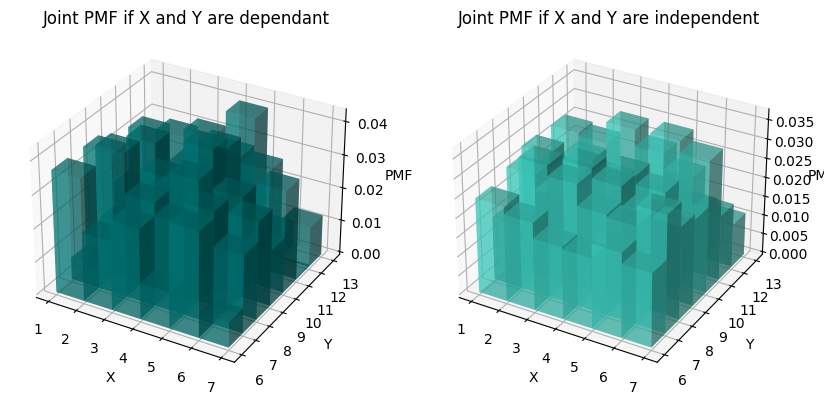

In [ ]:
## Plotting the above Joint PMFs

fig = plt.figure(figsize=(10,5))

xx,yy=np.meshgrid(x_val,y_val)
X,Y=xx.ravel(),yy.ravel()

bottom=np.zeros_like(joint).ravel()
width=depth=1
top1=joint.ravel()
top2=marginal_mat.ravel()

ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(X, Y, bottom, width, depth, top1, shade=True, color='teal', alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('PMF')
ax1.set_title('Joint PMF if X and Y are dependant')


ax2 = fig.add_subplot(122, projection='3d')
ax2.bar3d(X, Y, bottom, width, depth, top2, shade=True, color='turquoise', alpha=0.5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('PMF')
ax2.set_title('Joint PMF if X and Y are independent')


plt.show()


Q2: Plot the Joint PMF and the corresponding Joint CDF. Also, determine and plot the two Marginal PMFs and Marginal CDFs.

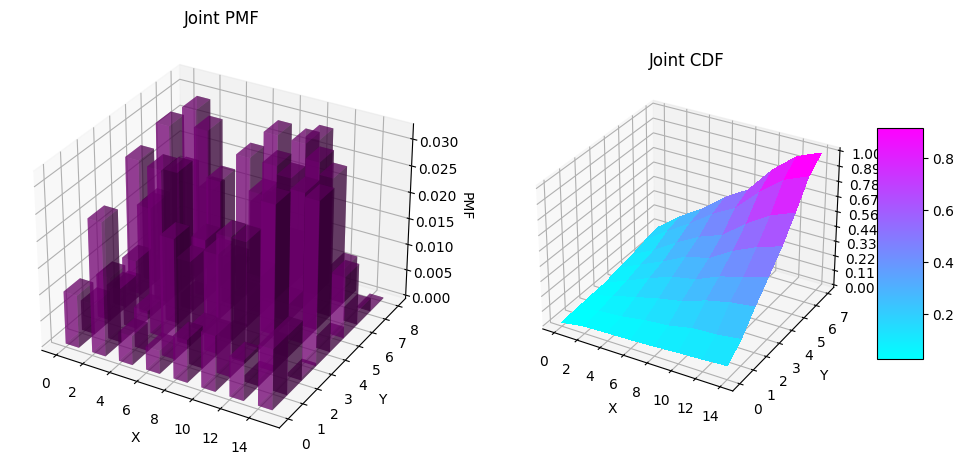

In [ ]:
## Joint PMF and CDF

x=np.arange(0, 15,step=2)
y=np.arange(0, 8)

joint2= joint_pmf(x.size, y.size)
cdf_joint=np.cumsum(np.cumsum(joint2, axis=0), axis=1)

fig = plt.figure(figsize=(12,6))

xx,yy=np.meshgrid(x,y)
X,Y=xx.ravel(),yy.ravel()

bottom=np.zeros_like(joint2).ravel()
width=depth=1
top=joint2.ravel()

ax1 = fig.add_subplot(121, projection='3d')
ax1.bar3d(X, Y, bottom, width, depth, top, shade=True, color='purple', alpha=0.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('PMF', rotation=-90)
ax1.set_title('Joint PMF')


ax2 = fig.add_subplot(122, projection='3d')
surf=ax2.plot_surface(xx, yy, cdf_joint, cmap=cm.cool, linewidth=0, antialiased=False)
ax2.set_zlim(0, 1)
ax2.zaxis.set_major_locator(LinearLocator(10))
ax2.zaxis.set_major_formatter('{x:.02f}')
fig.colorbar(surf, shrink=0.5, aspect=5)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('CDF', rotation=-90)
ax2.set_title('Joint CDF')

plt.show()



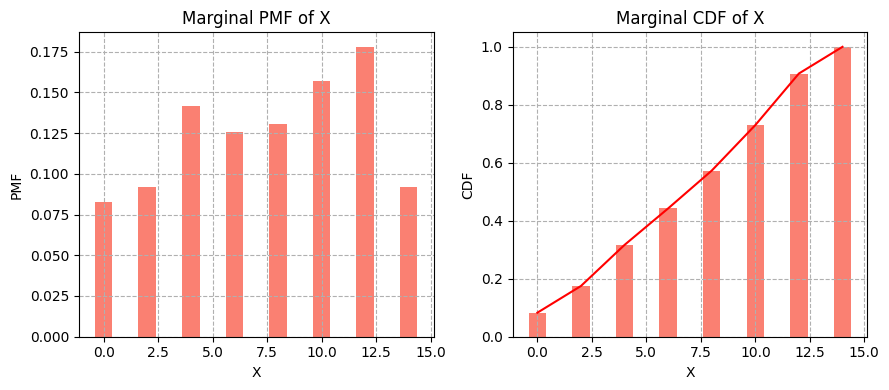

In [ ]:
## Marginal PMF and CMF of X

marginalx=np.array(np.sum(joint2,axis=1))
mcdf_x=np.cumsum(marginalx)

fig, axes=plt.subplots(1, 2, figsize=(9, 4))

axes[0].bar(x, marginalx, color='salmon')
axes[0].set_ylabel('PMF')
axes[0].set_xlabel('X')
axes[0].set_title('Marginal PMF of X')
axes[0].grid(linestyle='--')


axes[1].plot(x, mcdf_x, color='red')
axes[1].bar(x, mcdf_x, color='salmon')
axes[1].set_ylabel('CDF')
axes[1].set_xlabel('X')
axes[1].set_title('Marginal CDF of X')
axes[1].grid(linestyle='--')


plt.tight_layout()
plt.show()


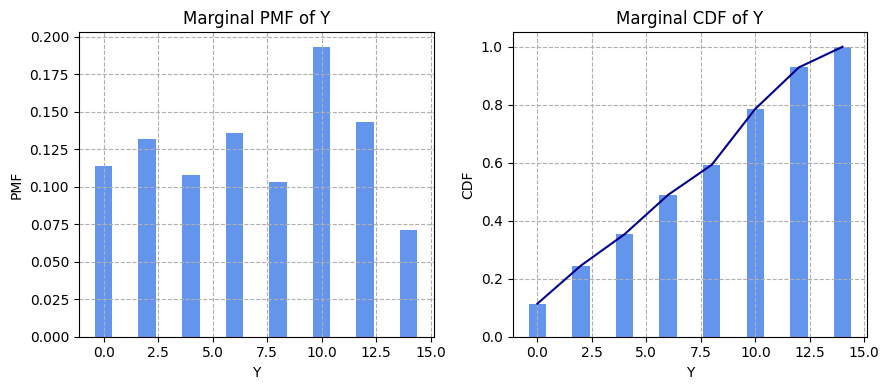

In [ ]:
## Marginal PMF and CMF of Y

marginaly=np.array(np.sum(joint2,axis=0))
mcdf_y=np.cumsum(marginaly)

fig, axes=plt.subplots(1, 2, figsize=(9,4))

axes[0].bar(x, marginaly, color='cornflowerblue')
axes[0].set_ylabel('PMF')
axes[0].set_xlabel('Y')
axes[0].set_title('Marginal PMF of Y')
axes[0].grid(linestyle='--')


axes[1].plot(x, mcdf_y, color='darkblue')
axes[1].bar(x,mcdf_y, color='cornflowerblue')
axes[1].set_ylabel('CDF')
axes[1].set_xlabel('Y')
axes[1].set_title('Marginal CDF of Y')
axes[1].grid(linestyle='--')


plt.tight_layout()
plt.show()

Q3 : Determine the value of E[XY]. If X1=X-E[X] and Y1=Y-E[Y], determine E[X1Y1].

In [ ]:
Exy=np.sum(x[:, None]*y*joint2)
Ex=np.sum(x*marginalx)
Ey=np.sum(y*marginaly)
Ex1y1=Exy-Ex*Ey

print('E[XY]:', Exy)
print('E[X1Y1]:', Ex1y1)

E[XY]: 26.012181318260904
E[X1Y1]: -0.3100168638578715
